In [62]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.linalg import eigh
import seaborn as sns

## Using PCA coverting 784 MNIST data to 2-D for visualization

### Using Direct Approach 

In [22]:
data = pd.read_csv('train.csv')
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
label = data['label']
label.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [24]:
data = data.drop('label',axis= 1)
data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
data.shape

(42000, 784)

In [26]:
label.shape

(42000,)

In [30]:
std_data = StandardScaler().fit_transform(data)
std_data.shape

(42000, 784)

In [40]:
std_data.T.shape

(784, 42000)

In [39]:
std_data.shape

(42000, 784)

In [41]:
sample = std_data

In [42]:
co_variance = np.matmul(sample.T,sample)
co_variance.shape

(784, 784)

In [51]:
values,vectors = eigh(co_variance,eigvals=(782,783))

In [54]:
vectors.shape

(784, 2)

In [55]:
vectors = vectors.T

In [56]:
vectors.shape

(2, 784)

In [57]:
co_ordinates = np.matmul(vectors,sample.T)

In [59]:
cordinates = np.vstack((co_ordinates,label)).T

In [61]:
df = pd.DataFrame(data=cordinates,columns =("f1","f2",'label') )

C:\Users\Dhiraj\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


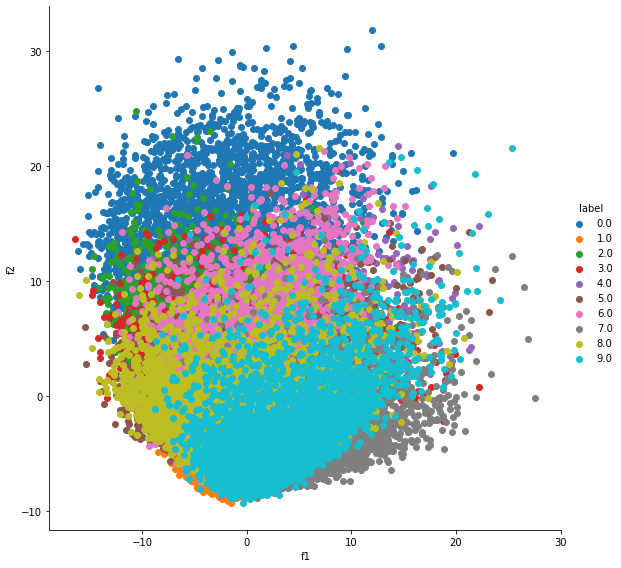

In [63]:
sns.FacetGrid(df,hue="label",size=8).map(plt.scatter,'f1','f2').add_legend()
plt.show()

### Using scikit_learn

In [65]:
from sklearn import decomposition

In [66]:
pca = decomposition.PCA()

In [67]:
pca.n_components = 2

In [68]:
pca_data = pca.fit_transform(sample)

In [70]:
pca_data = np.vstack((pca_data.T,label)).T

In [72]:
pca_df = pd.DataFrame(data=pca_data,columns=('f1','f2','label'))

C:\Users\Dhiraj\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


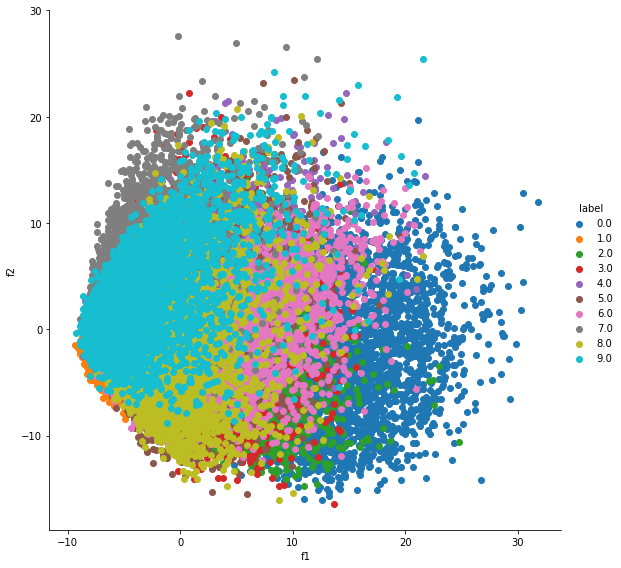

In [73]:
sns.FacetGrid(pca_df,hue="label",size=8).map(plt.scatter,'f1','f2').add_legend()
plt.show()